### An example showing the plot_precision_recall_curve method used by a scikit-learn classifier

In this example, we'll be plotting a `precision_recall_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.metrics.plot_precision_recall_curve` method.

In [1]:
import numpy as np
from sklearn.datasets import load_digits as data_10_classes
from sklearn.model_selection import train_test_split

np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp

sp.__version__

'0.4.1.dev0+git20241223.1edc8f2'

## Keras

In [3]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import tensorflow as tf

# Load the digits dataset
X, y = data_10_classes(return_X_y=True)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [4]:
# Convert labels to one-hot encoding
Y_train = tf.keras.utils.to_categorical(y_train)
Y_val = tf.keras.utils.to_categorical(y_val)

# Define a simple TensorFlow model
model = tf.keras.Sequential(
	[
		tf.keras.layers.Input(shape=(X_train.shape[1],)),
		tf.keras.layers.Dense(64, activation='relu'),
		tf.keras.layers.Dense(32, activation='relu'),
		tf.keras.layers.Dense(10, activation='softmax'),
	]
)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

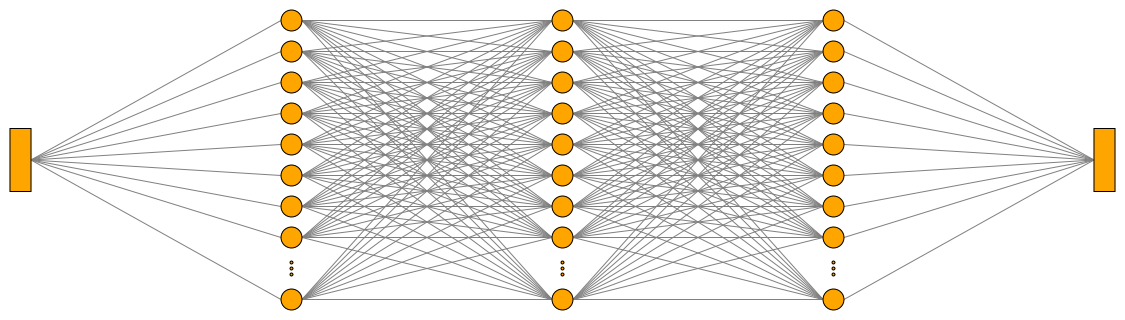

In [10]:
sp.visualkeras.graph_view(model, node_size=21)

In [11]:
sp.visualkeras.layered_view(model)

/home/jovyan/work/contribution/scikit-plots/scikitplot/visualkeras/layered.py:151: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


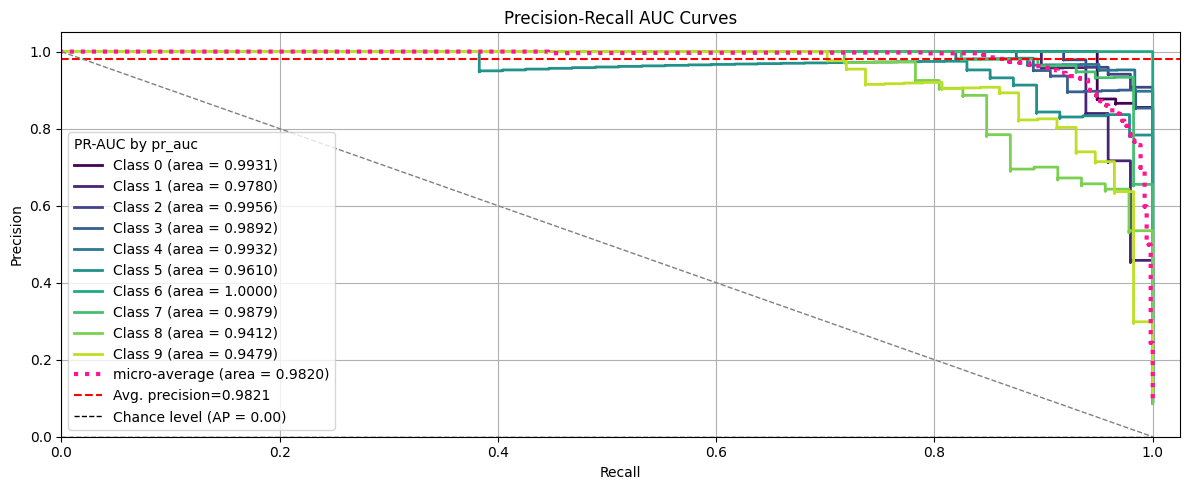

In [12]:
# Train the model
model.fit(
	X_train,
	Y_train,
	batch_size=64,
	epochs=10,
	validation_data=(X_val, Y_val),
	verbose=0,
)

# Predict probabilities on the validation set
y_probas = model.predict(X_val)

# Plot precision-recall curves
sp.metrics.plot_precision_recall(y_val, y_probas)
plt.show()